In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df= pd.read_excel('dfwavgscores.xlsx')

# I want to choose a dataset from the filtered one ( z score etc. ) and then do these correlation thingies for the numeric data. 

Rearrange order of columns -put asdage with other demographic    
Sweden does the best and Egypt does the worst. 
**I want to get back all the asbg10 ones - they are useful** 
## I can use the differing demographic data to see if there is that affects experience in schools and reading scores. 
Should also compare reading scores with the benchmark and can also compare with previous years.
If I get data from different dates maybe I can practice the time/date stuff. change asbh02a to immigrant/ non - immigrant

In [2]:
freq_table = (df['avgscore'].value_counts(normalize = True, bins=10)*100).sort_index()
freq_table

(83.868, 151.789]      0.333615
(151.789, 219.036]     2.199927
(219.036, 286.283]     5.669044
(286.283, 353.53]      9.072888
(353.53, 420.777]     14.009428
(420.777, 488.024]    20.674483
(488.024, 555.271]    24.864015
(555.271, 622.517]    18.479391
(622.517, 689.764]     4.479633
(689.764, 757.011]     0.217575
Name: avgscore, dtype: float64

## Demographic stuff

In [3]:
demographic_info_columns = ['Country', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03','MINAGEARRIVAL', 'rounded_ages','ASDAGE','avgscore']

In [4]:
df_demo = df[demographic_info_columns]

In [5]:
correlation_matrix = df_demo.corr()

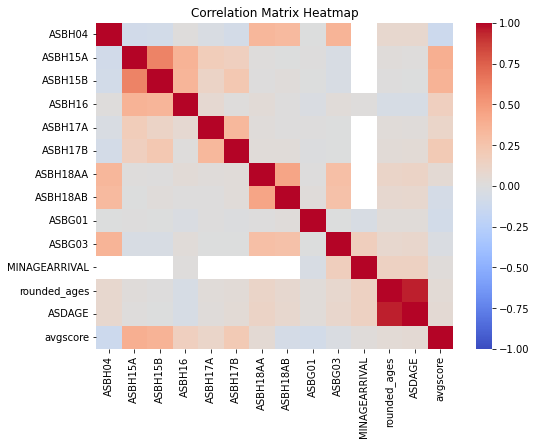

In [6]:
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

`ASBH02A	GEN\CHILD BORN IN <COUNTRY>\
ASBH02B	GEN\AGE OF CHILD WHEN CAME TO <COUNTRY>\
ASBH03A	GEN\LANGUAGE<LANGUAGE OF TEST>\
ASBH04	GEN\HOW OFTEN <LANG OF TEST> AT HOME\
ASBH15A	GEN\LVL OF EDUCATIONGUARDIAN A\
ASBH15B	GEN\LVL OF EDUCATIONGUARDIAN B\
ASBH16	GEN\LVL OF EDUCATIONCHILD\
ASBH17A	GEN\WHAT KIND OF MAIN JOB\GUARDIAN A\
ASBH17B	GEN\WHAT KIND OF MAIN JOB\GUARDIAN B\
ASBH18AA	GEN\LANGUAGE SPOKEN<LANGUAGE OF TEST>GUARDIAN A\
ASBH18AB	GEN\LANGUAGE SPOKEN<LANGUAGE OF TEST>GUARDIAN B\
ASBH18BA	GEN\LANGUAGE SPOKEN<COUNTRY-SPECIFIC>GUARDIAN A\
ASBH18BB	GEN\LANGUAGE SPOKEN<COUNTRY-SPECIFIC>GUARDIAN B`

With the above I just want to focus on the bottom row really - remove the rest? There is a light negative correlation between speaking the language of test at home and the average score. Also those whose parents have more education have performed better overall. However, we can only use numerical columns for a correlation matrix. For non-numerical columns we can try the methods below.

## Non-numeric

## The below is for comparing columns that are non-numeric. It might be worthwhile to hot-code!? these columns so that we can do .corr with them. Like the ones above. I also want to look at the ones above in more detail.

In [7]:
from scipy.stats import chi2_contingency

In [8]:
# Create a contingency table
contingency_table = pd.crosstab(df['ASBH02A'], df['avgscore'])

In [9]:
# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [10]:
contingency_table.head()

avgscore  84.541739   92.754164   92.864064   93.861262   96.943577   \
ASBH02A                                                                
No                 0           0           0           0           0   
Yes                1           1           1           1           1   

avgscore  99.447545   101.596181  102.850844  103.179802  103.849628  \
ASBH02A                                                                
No                 0           0           0           0           0   
Yes                1           1           1           1           1   

avgscore  103.976826  104.620215  107.646802  108.358496  108.540923  \
ASBH02A                                                                
No                 0           0           0           0           0   
Yes                1           1           1           1           1   

avgscore  108.949767  109.863619  110.065416  112.982405  113.484359  \
ASBH02A                                                                
No                 0           0           0           0           0   
Yes                1           1           1           1           1   

avgscore  114.220907  114.532689  114.717567  115.567569  115.969727  \
ASBH02A                                                                
No                 0           0           0           0           0   
Yes                1           1           1           1           1   

avgscore  116.716899  117.747568  117.905664  118.499331  119.676084  \
ASBH02A                                                                
No                 0           0           0           0           0   
Yes                1           1           1           1           1   

avgscore  120.234149  120.465239  120.695963  121.319685  121.642326  \
ASBH02A                                                                
No                 0           0           0           0           0   
Yes                1           1           1           1           1   

avgscore  122.175449  122.674766  122.701758  123.758864  124.943933  \
ASBH02A                                                                
No                 0           0           0           0           0   
Yes                1           1           1           1           1   

avgscore  125.439988  125.874072  126.618688  127.457511  129.197652  \
ASBH02A                                                                
No                 0           0           0           0           0   
Yes                1           1           1           1           1   

avgscore  129.275206  129.636918  130.611489  130.781265  131.828728  \
ASBH02A                                                                
No                 0           0           0           0           0   
Yes                1           1           1           1           1   

avgscore  131.887382  133.038511  133.264038  133.407238  133.445138  \
ASBH02A                                                                
No                 0           0           0           0           0   
Yes                1           1           1           1           1   

avgscore  133.880167  134.066192  134.395313  134.587563  134.995835  \
ASBH02A                                                                
No                 0           0           0           0           0   
Yes                1           1           1           1           1   

avgscore  135.110928  135.638212  135.654127  135.838997  136.310486  \
ASBH02A                                                                
No                 0           0           0           0           0   
Yes                1           1           1           1           1   

avgscore  137.374234  137.485959  137.541866  137.630606  138.530212  \
ASBH02A                                                                
No                 0           0           0           1           0   
Yes                1       

In [11]:
print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Test Statistic: 41365.00000000001
P-value: 0.49630132644040176


The Chi-Square Test of Independence is a statistical test used to determine whether there is a significant association between two categorical variables. The results you provided include two key pieces of information: the Chi-Square Test Statistic and the P-value. Here's what each means:

Chi-Square Test Statistic
Chi-Square Test Statistic: 41365.00000000001
The Chi-Square Test Statistic is a measure of how much the observed frequencies in the contingency table deviate from the expected frequencies (the frequencies we would expect if there were no association between the variables).

A large Chi-Square Test Statistic indicates a large deviation from the expected frequencies, suggesting that there is an association between the variables.
Conversely, a small Chi-Square Test Statistic indicates that the observed frequencies are close to the expected frequencies, suggesting no association between the variables.
P-value
P-value: 0.49630132644040176
The P-value is the probability of obtaining a test statistic at least as extreme as the one observed, assuming that the null hypothesis (no association between the variables) is true.

A small P-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, suggesting that there is a significant association between the variables.
A large P-value (> 0.05) indicates weak evidence against the null hypothesis, suggesting that there is no significant association between the variables.
Interpretation
Chi-Square Test Statistic: 41365.00000000001
P-value: 0.49630132644040176
The P-value of approximately 0.496 suggests that there is a 49.6% chance of obtaining a Chi-Square Test Statistic of 41365 or higher under the assumption that the null hypothesis is true (i.e., there is no association between the variables). Since this P-value is much larger than 0.05, we do not have enough evidence to reject the null hypothesis.

Conclusion
There is no significant association between the variables in the contingency table. The high Chi-Square Test Statistic value seems unusual given the high P-value, which suggests that there might be an issue with the data or the way the test was performed. It might be useful to recheck the data or the contingency table to ensure there are no errors or anomalies.

Let's see how this works with multiple columns.

In [ ]:
import plotly.express as px

# Create a contingency table with the original data
contingency_table = pd.crosstab(df['ASBH02A'], df['avgscore'])

# Convert the contingency table to a format suitable for Plotly
contingency_table_reset = contingency_table.reset_index()
contingency_table_melted = contingency_table_reset.melt(id_vars='ASBH02A', var_name='avgscore', value_name='count')

# Plot the heatmap using Plotly
fig = px.density_heatmap(contingency_table_melted, x='ASBH02A', y='avgscore', z='count', color_continuous_scale='coolwarm')
fig.update_layout(title='Heatmap of Frequency Counts')
fig.show()

In [ ]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Create a confusion matrix
confusion_matrix = pd.crosstab(df['ASBH02A'], df['avgscore'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print(f"Cramér's V: {cramers_v_value}")

In [ ]:
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap for Encoded Categorical Data')
plt.show()

In [ ]:
# Sample a subset of the data
df_sample = df.sample(n=10)  # Adjust the sample size as needed

# Create a contingency table with the sample
contingency_table = pd.crosstab(df_sample['ASBH02A'], df_sample['avgscore'])

# Plot the heatmap with the sample
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=False, cmap='coolwarm')
plt.title('Heatmap of Frequency Counts')
plt.show()